**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from prophet import Prophet
import io, os, sys, setuptools, tokenize
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Dataset reading**

In [ ]:
data = pd.read_csv("/content/portfolio_data.csv",parse_dates=['Date'])
print(data)

           Date         AMZN         DPZ          BTC        NFLX
0    2013-05-01   248.229996   51.190983   106.250000   30.415714
1    2013-05-02   252.550003   51.987320    98.099998   30.641428
2    2013-05-03   258.049988   52.446388   112.900002   30.492857
3    2013-05-06   255.720001   53.205257   109.599998   30.098572
4    2013-05-07   257.730011   54.151505   113.199997   29.464285
...         ...          ...         ...          ...         ...
1515 2019-05-08  1917.770020  283.149994  6171.959961  364.369995
1516 2019-05-09  1899.869995  282.160004  6358.290039  362.750000
1517 2019-05-10  1889.979980  278.369995  7191.359863  361.040009
1518 2019-05-13  1822.680054  273.880005  7980.129883  345.260010
1519 2019-05-14  1840.119995  272.859985  8183.830078  345.609985

[1520 rows x 5 columns]


**Convert Date column to datetime**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
print(data.columns)

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')


**Data preprocessing**

In [ ]:
data = data.dropna()

**Sort the dataframe by date**

In [ ]:
data = data.sort_values('Date')

**Plot the initial data for each stock**

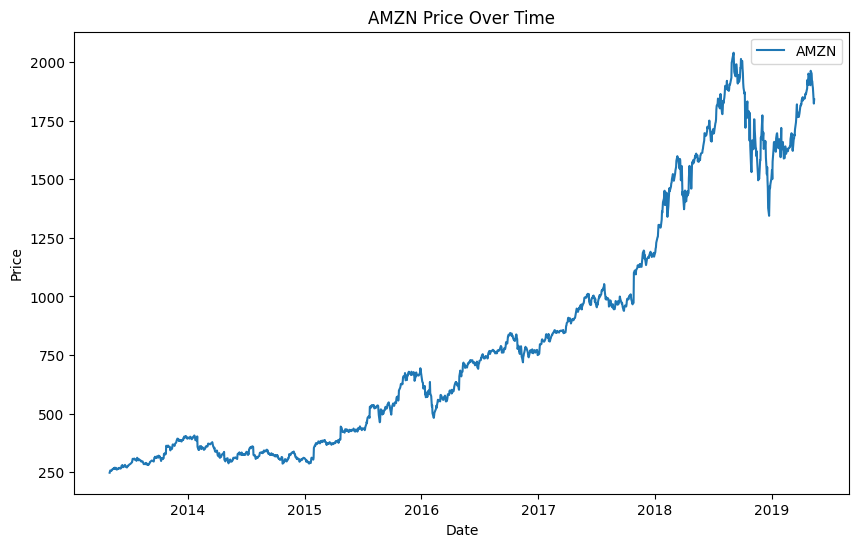

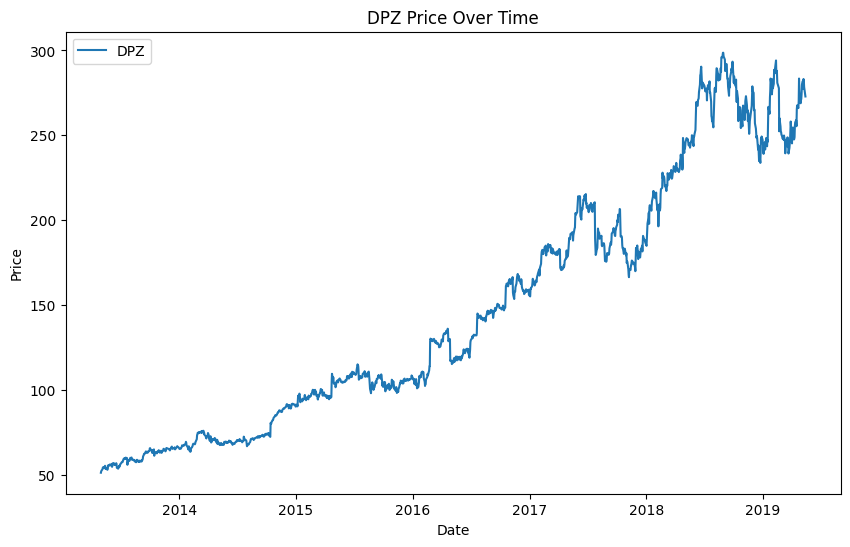

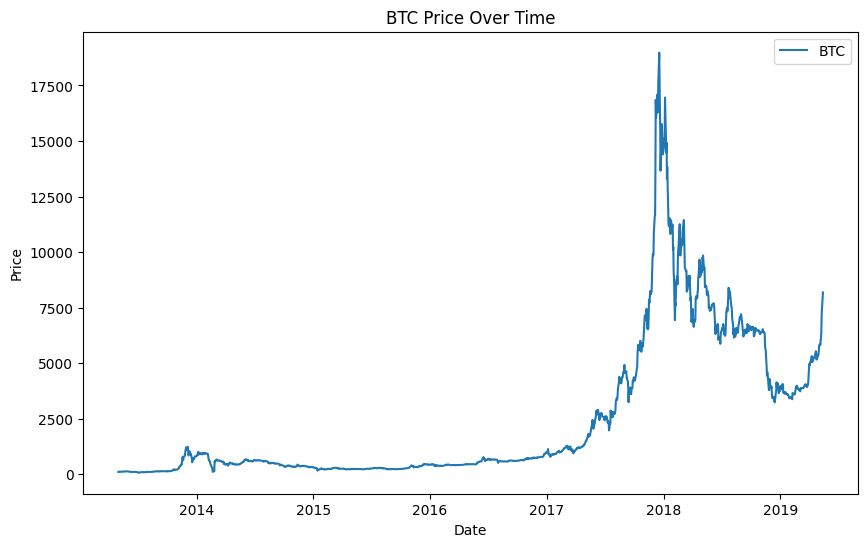

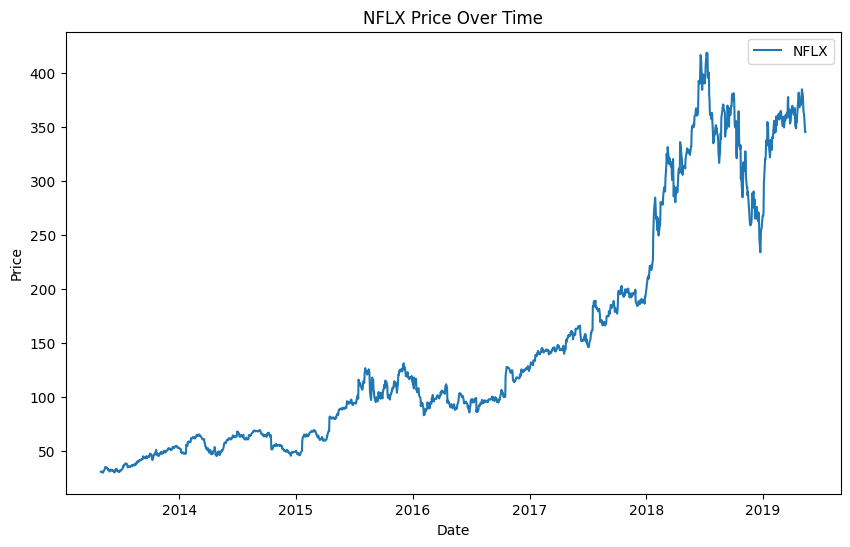

In [ ]:
for stock in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data[stock], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock} Price Over Time')
    plt.legend()
    plt.show()


**Perform decomposition for each stock**

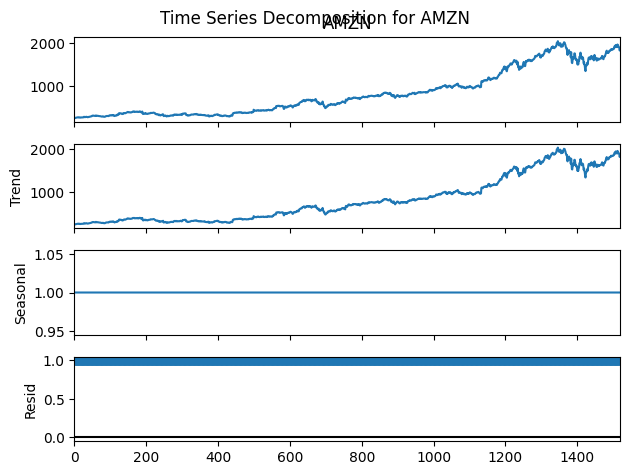

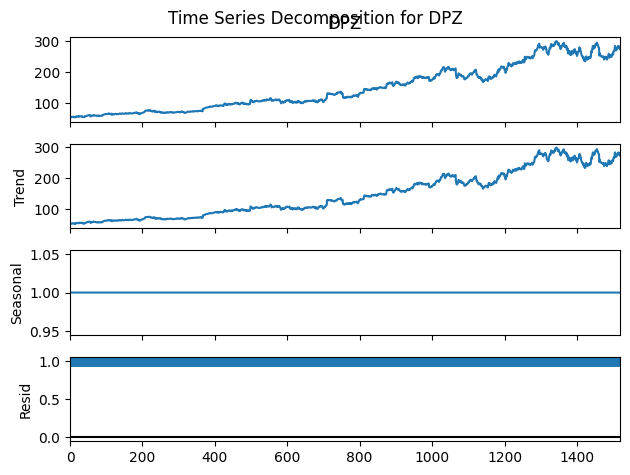

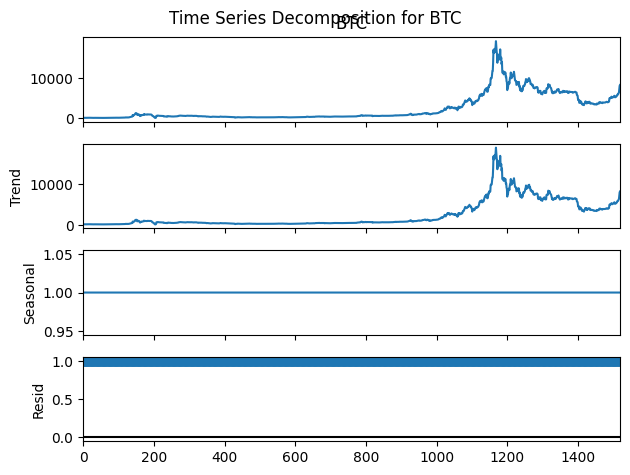

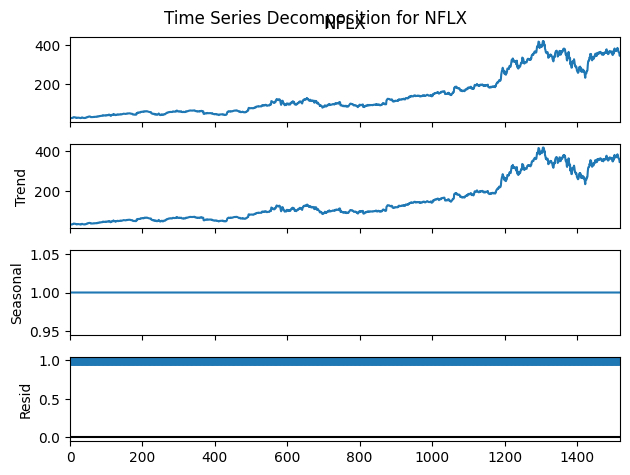

In [ ]:
for stock in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    result = seasonal_decompose(data[stock], model='multiplicative', period=1)
    result.plot()
    plt.suptitle(f'Time Series Decomposition for {stock}')
    plt.show()

**Perform Augmented Dickey-Fuller test for each stock**

In [ ]:
for stock in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    result = adfuller(data[stock])
    print(f'ADF Statistic for {stock}: {result[0]}')
    print(f'p-value for {stock}: {result[1]}')

ADF Statistic for AMZN: 0.55365991233002
p-value for AMZN: 0.9864159495725892
ADF Statistic for DPZ: -0.2793349606892411
p-value for DPZ: 0.9283805552655593
ADF Statistic for BTC: -1.323081119891322
p-value for BTC: 0.6185476417504847
ADF Statistic for NFLX: -0.1841581933608912
p-value for NFLX: 0.9403837629187612


**Prepare the data for Prophet and fit the model for each stock**

DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/pgglx108.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/_xec9m3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25509', 'data', 'file=/tmp/tmppqk6_8qh/pgglx108.json', 'init=/tmp/tmppqk6_8qh/_xec9m3p.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modelngg_xvix/prophet_model-20240524102723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


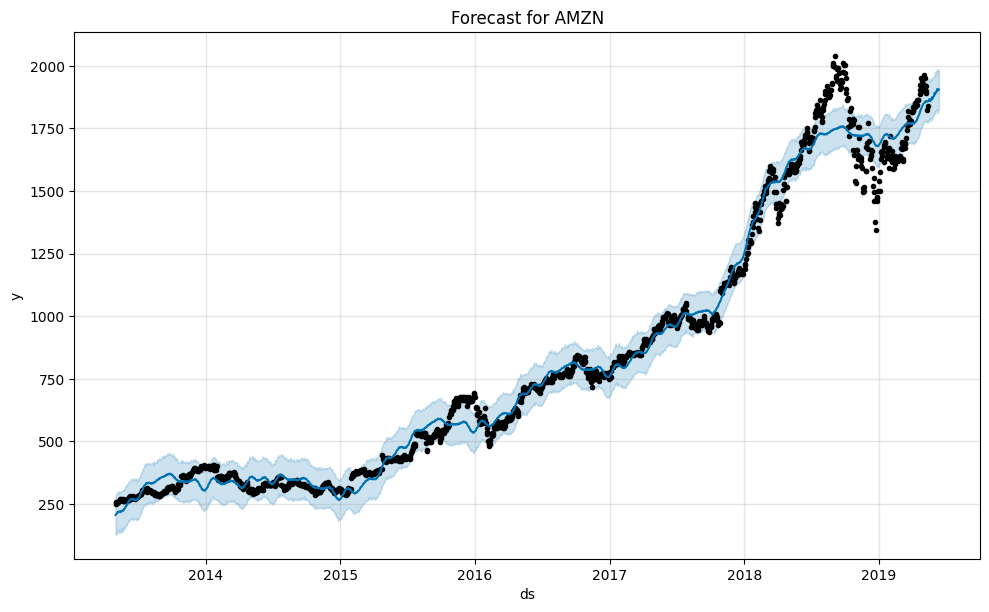

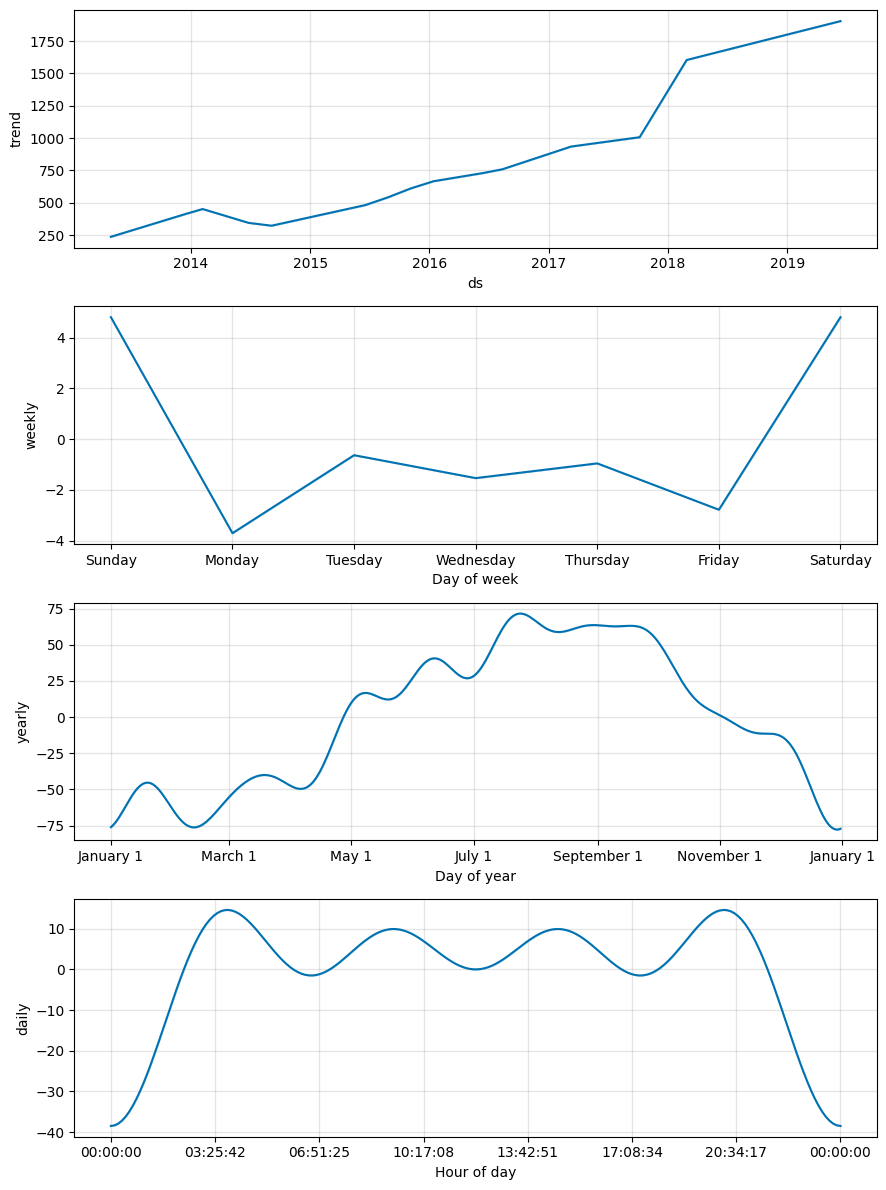

DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/ajw7j4fs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/l5kfb8u7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55928', 'data', 'file=/tmp/tmppqk6_8qh/ajw7j4fs.json', 'init=/tmp/tmppqk6_8qh/l5kfb8u7.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modelw8lkv3gr/prophet_model-20240524102727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


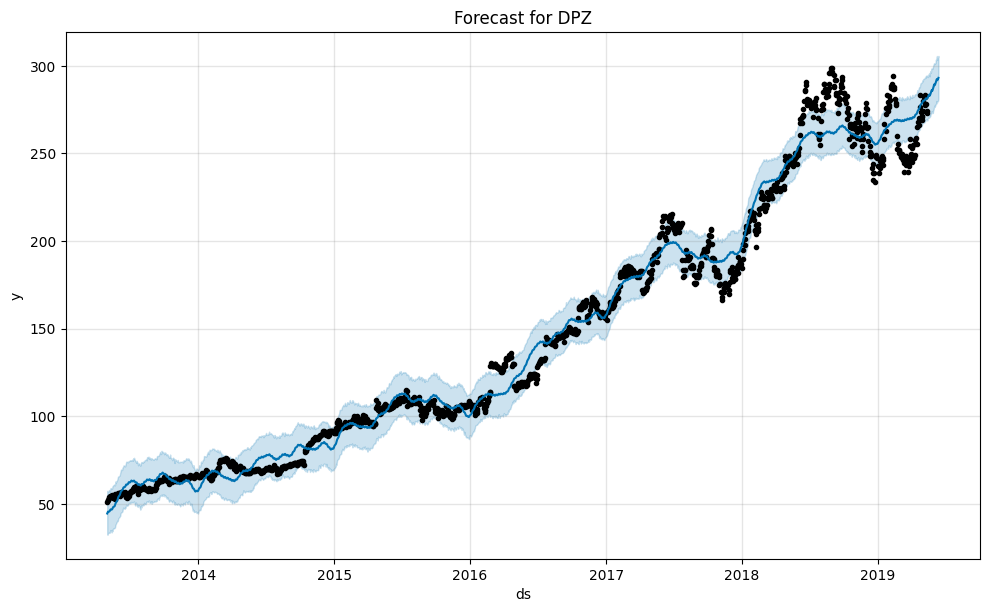

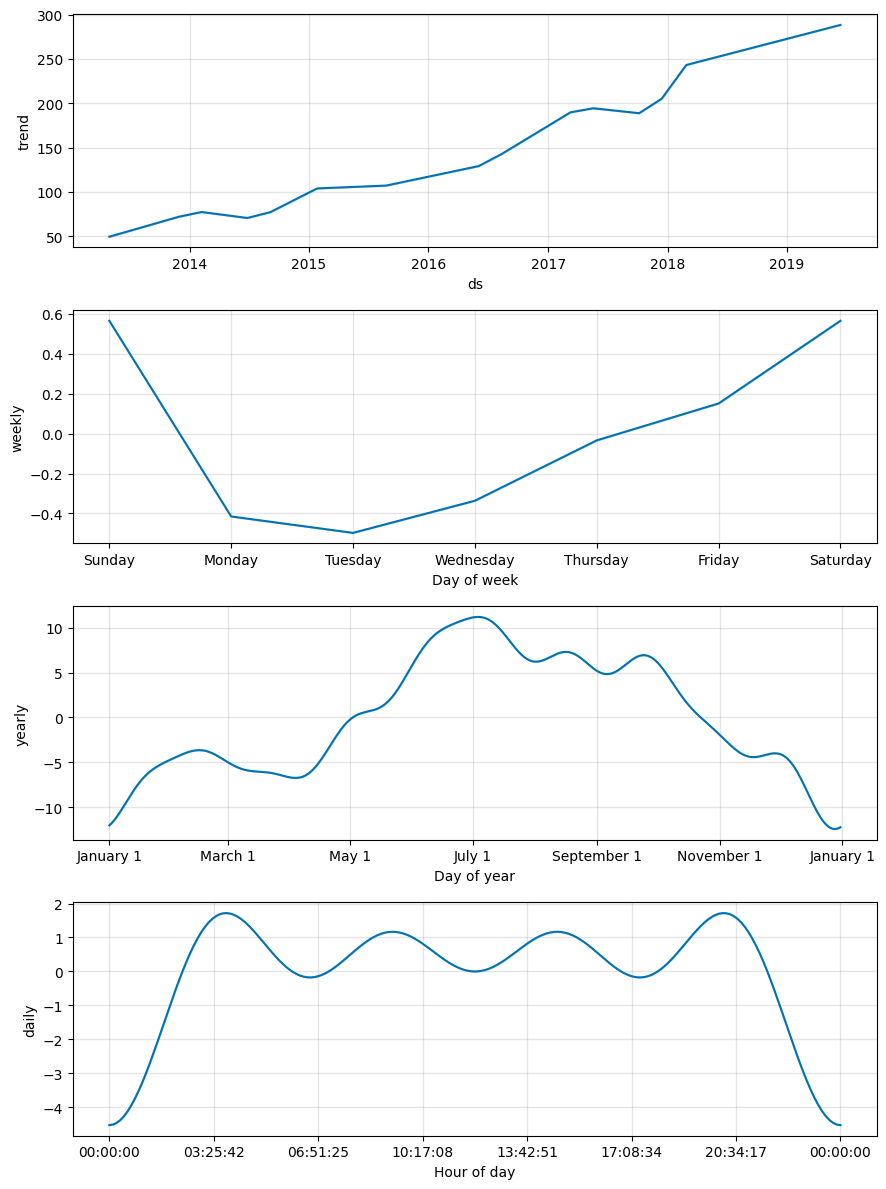

DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/ap7gcby_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/beqicfkz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43787', 'data', 'file=/tmp/tmppqk6_8qh/ap7gcby_.json', 'init=/tmp/tmppqk6_8qh/beqicfkz.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modeljweds3u5/prophet_model-20240524102730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


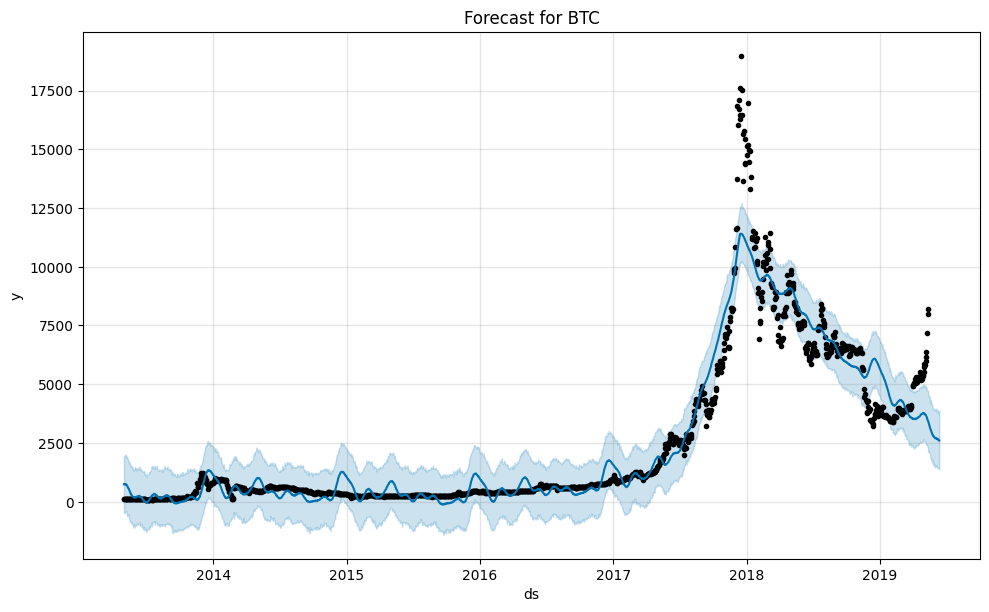

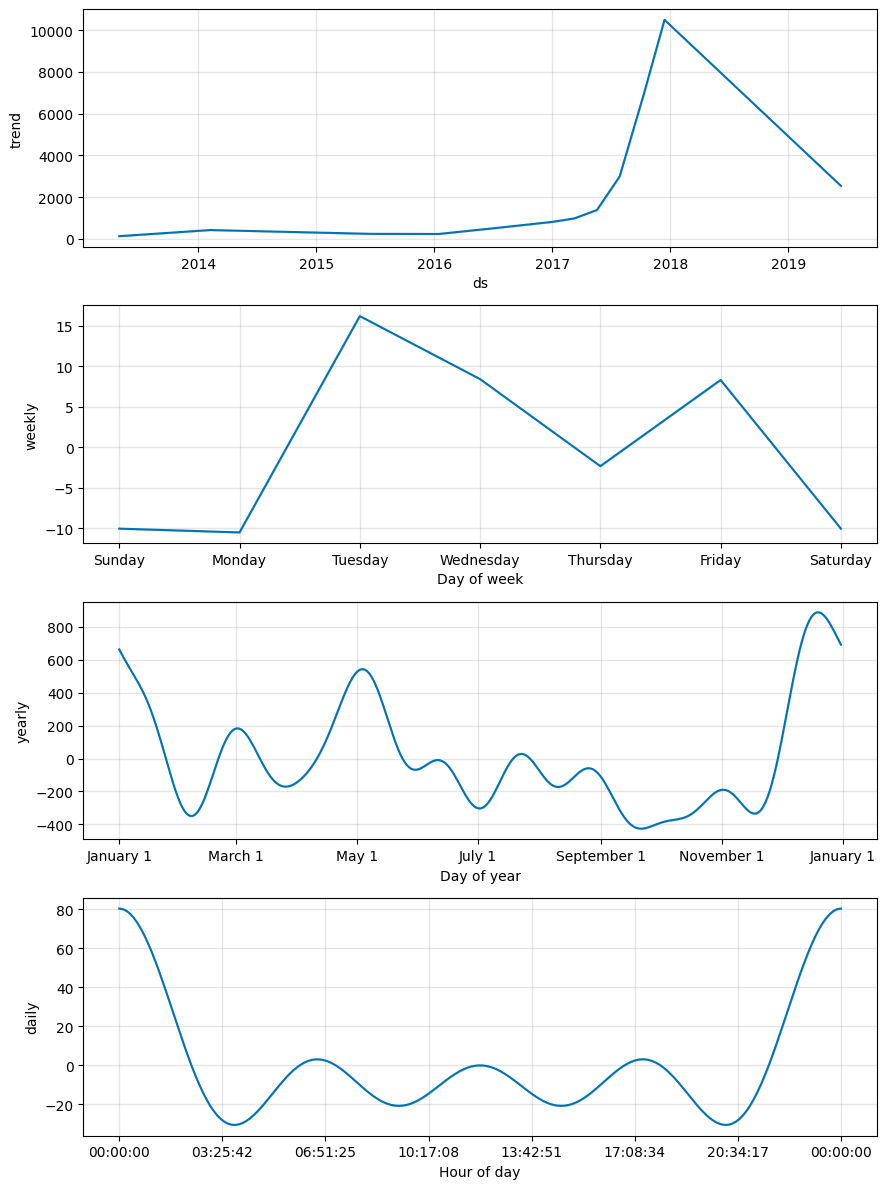

DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/uscbfawy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/4ofryx1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93481', 'data', 'file=/tmp/tmppqk6_8qh/uscbfawy.json', 'init=/tmp/tmppqk6_8qh/4ofryx1_.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modelcc724ru2/prophet_model-20240524102733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


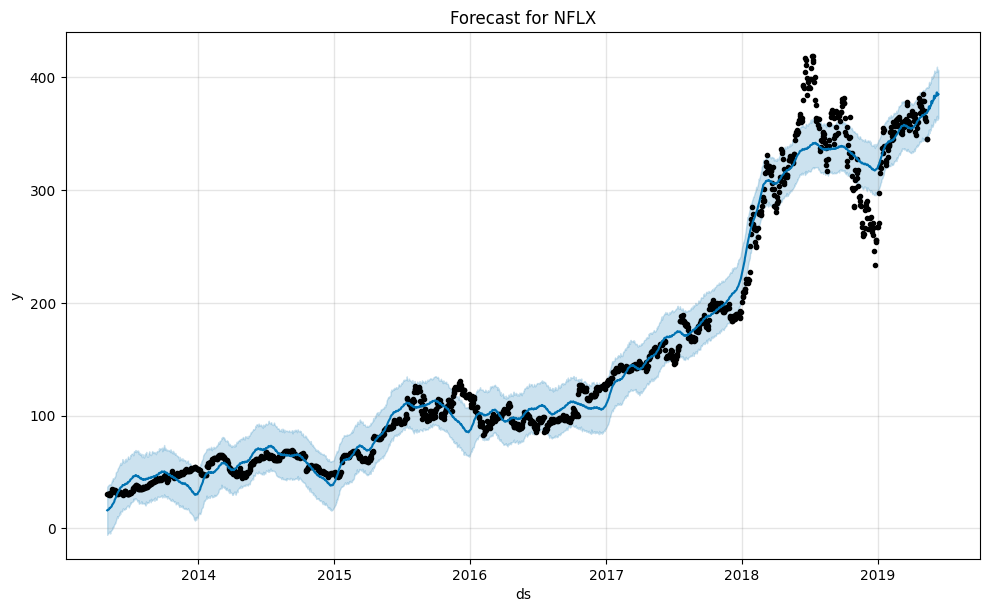

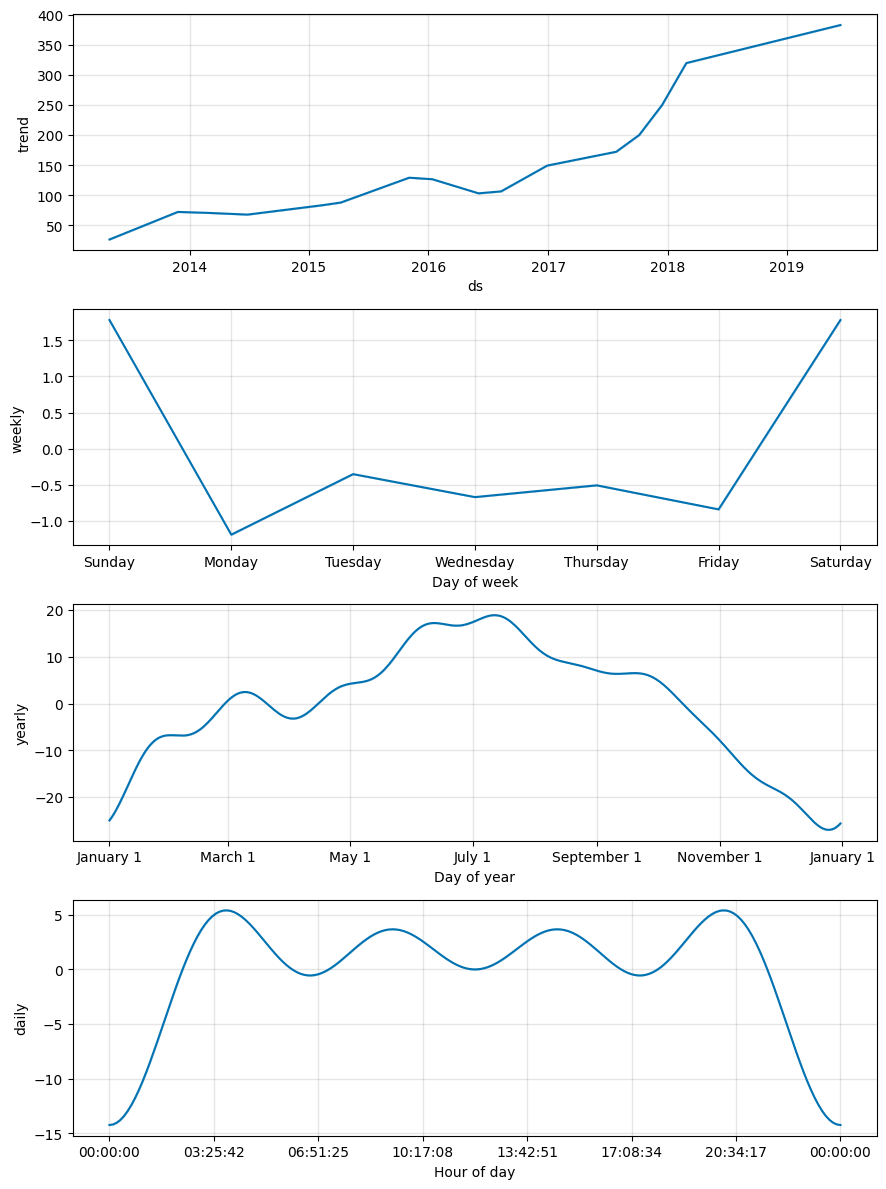

In [ ]:
forecast_results = {}

for stock in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    data_prophet = data[['Date', stock]].rename(columns={'Date': 'ds', stock: 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(data_prophet)

    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

   #store results
    forecast_results[stock] = forecast

    fig = model.plot(forecast)
    plt.title(f'Forecast for {stock}')
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

In [ ]:
!python --version


Python 3.10.12


**Define a function for model evaluation**

In [ ]:
def evaluate_forecast(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


**Split the data into training and test sets**

In [ ]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

**Fit the Prophet model and make predictions for each stock**

In [ ]:
forecast_results = {}

for stock in ['AMZN', 'DPZ', 'BTC', 'NFLX']:
    df_prophet = data[['Date', stock]].rename(columns={'Date': 'ds', stock: 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=len(test_data))
    forecast = model.predict(future)

    # Store the forecast results
    forecast_results[stock] = forecast

    true_values = test_data[stock].values
    predicted_values = forecast[-len(test_data):]['yhat'].values

    mae, mse, rmse = evaluate_forecast(true_values, predicted_values)

    print(f'Model Evaluation for {stock}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/ksyg9fcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/gprrnh41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10111', 'data', 'file=/tmp/tmppqk6_8qh/ksyg9fcw.json', 'init=/tmp/tmppqk6_8qh/gprrnh41.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_model0mrj41lr/prophet_model-20240524102746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/ddh9cfj6.json


Model Evaluation for AMZN:
Mean Absolute Error (MAE): 244.47848662192652
Mean Squared Error (MSE): 76957.65721527723
Root Mean Squared Error (RMSE): 277.41243161631604


DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/mlzbpgpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81804', 'data', 'file=/tmp/tmppqk6_8qh/ddh9cfj6.json', 'init=/tmp/tmppqk6_8qh/mlzbpgpk.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modelzxgvjs7z/prophet_model-20240524102749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/9kmxr89a.json


Model Evaluation for DPZ:
Mean Absolute Error (MAE): 35.31153806335724
Mean Squared Error (MSE): 1591.5019825421473
Root Mean Squared Error (RMSE): 39.89363335849653


DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/29rhbsg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51230', 'data', 'file=/tmp/tmppqk6_8qh/9kmxr89a.json', 'init=/tmp/tmppqk6_8qh/29rhbsg4.json', 'output', 'file=/tmp/tmppqk6_8qh/prophet_modelsz0_dba9/prophet_model-20240524102753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/_6wyw_1s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppqk6_8qh/wi9cy7_d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.b

Model Evaluation for BTC:
Mean Absolute Error (MAE): 5314.731687157544
Mean Squared Error (MSE): 29868450.923459996
Root Mean Squared Error (RMSE): 5465.203648855182


10:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Evaluation for NFLX:
Mean Absolute Error (MAE): 48.37990747413381
Mean Squared Error (MSE): 3173.7801590413032
Root Mean Squared Error (RMSE): 56.33631296988918


 ***LSTM***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


data = pd.read_csv("/content/portfolio_data.csv",parse_dates=['Date'])
print(data)

           Date         AMZN         DPZ          BTC        NFLX
0    2013-05-01   248.229996   51.190983   106.250000   30.415714
1    2013-05-02   252.550003   51.987320    98.099998   30.641428
2    2013-05-03   258.049988   52.446388   112.900002   30.492857
3    2013-05-06   255.720001   53.205257   109.599998   30.098572
4    2013-05-07   257.730011   54.151505   113.199997   29.464285
...         ...          ...         ...          ...         ...
1515 2019-05-08  1917.770020  283.149994  6171.959961  364.369995
1516 2019-05-09  1899.869995  282.160004  6358.290039  362.750000
1517 2019-05-10  1889.979980  278.369995  7191.359863  361.040009
1518 2019-05-13  1822.680054  273.880005  7980.129883  345.260010
1519 2019-05-14  1840.119995  272.859985  8183.830078  345.609985

[1520 rows x 5 columns]


Epoch 1/100
19/19 [==============================] - 4s 7ms/step - loss: 0.0433
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0101
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0042
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 8.4545e-04
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 7.6352e-04
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 7.1659e-04
Epoch 10/100
19/19 [==============================] - 0s 7ms/step - loss: 6.7595e-04
Epoch 11/100
19/19 [==============================] - 0s 8ms/step - loss: 6.4589e-04
Epoch 12/100
19/19 [==============================] - 0s 8ms/step - loss: 6.0428e-04
Epoch 13/100


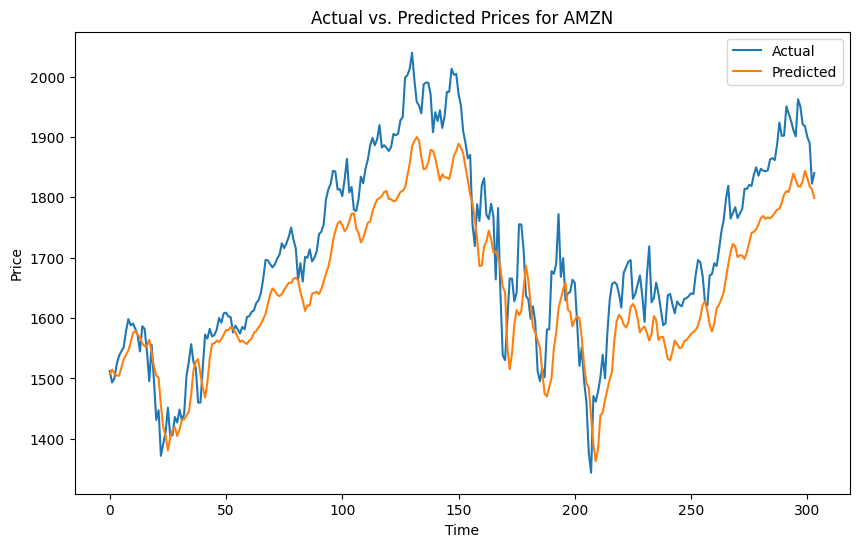

In [ ]:

data['Date'] = pd.to_datetime(data['Date'])


data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 3
X, y = prepare_data(scaled_data, time_steps)

# Split data into train and testing
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, data.shape[1])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(data.shape[1]))  # Adjust the number of units based on the number of features
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_inv, predictions)
mse = mean_squared_error(y_test_inv, predictions)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv[:, 0], label='Actual')
plt.plot(predictions[:, 0], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices for AMZN')
plt.legend()
plt.show()

***Single stock***

In [ ]:
import yfinance as yf

ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [ ]:
import pandas as pd

stock_prices = stock_data['Close'].dropna()
stock_prices.head()


Date
2010-01-04    7.643214
2010-01-05    7.656429
2010-01-06    7.534643
2010-01-07    7.520714
2010-01-08    7.570714
Name: Close, dtype: float64

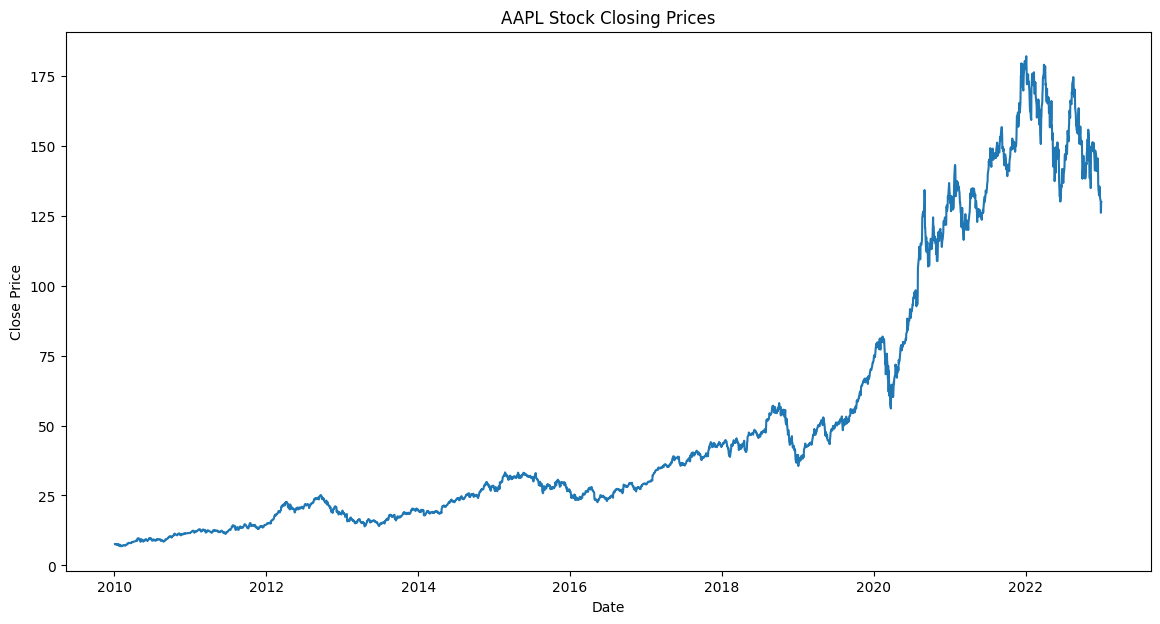

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(stock_prices)
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(stock_prices)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic: -0.2877611181661402
p-value: 0.9272199267187232
Critical Value 1%: -3.4323643041051666
Critical Value 5%: -2.862429999065346
Critical Value 10%: -2.5672437656428793


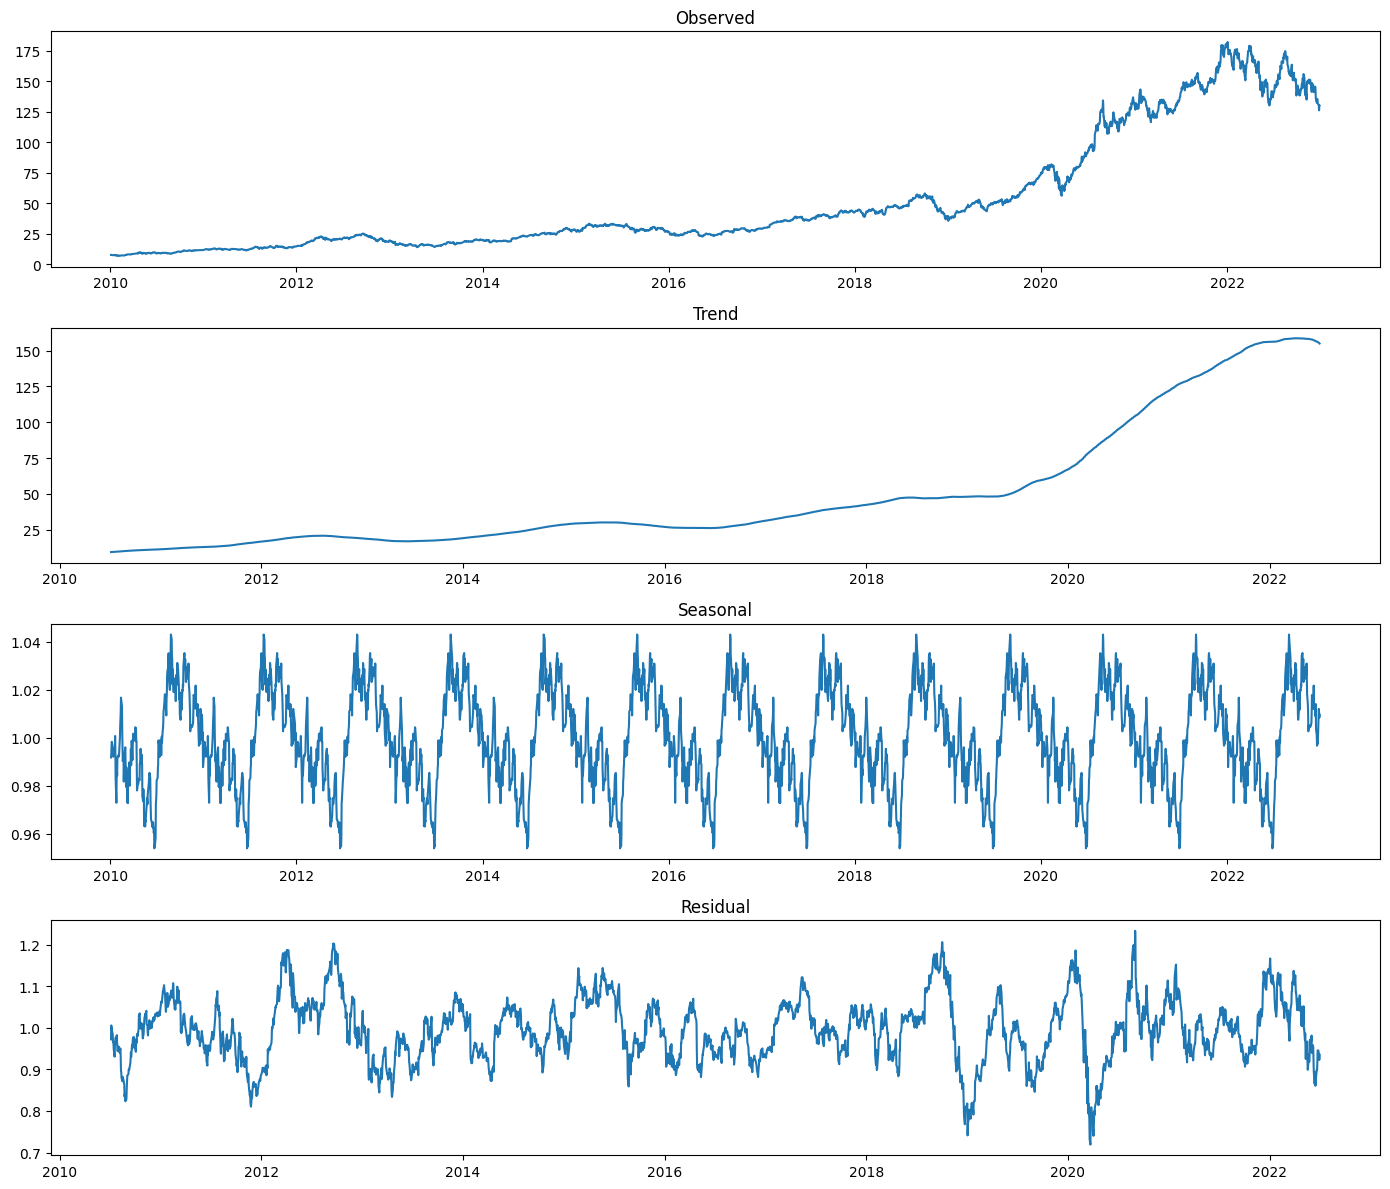

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(stock_prices, model='multiplicative', period=252)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
ax1.plot(decomposition.observed)
ax1.set_title('Observed')
ax2.plot(decomposition.trend)
ax2.set_title('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(stock_prices, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3272
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5746.764
Date:                Fri, 24 May 2024   AIC                          11505.528
Time:                        12:06:33   BIC                          11542.085
Sample:                             0   HQIC                         11518.620
                               - 3272                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0564      0.008     -7.021      0.000      -0.072      -0.041
ar.L2         -0.0284      0.008     -3.523      0.000      -0.044      -0.013
ar.L3         -0.0307      0.009     -3.407      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


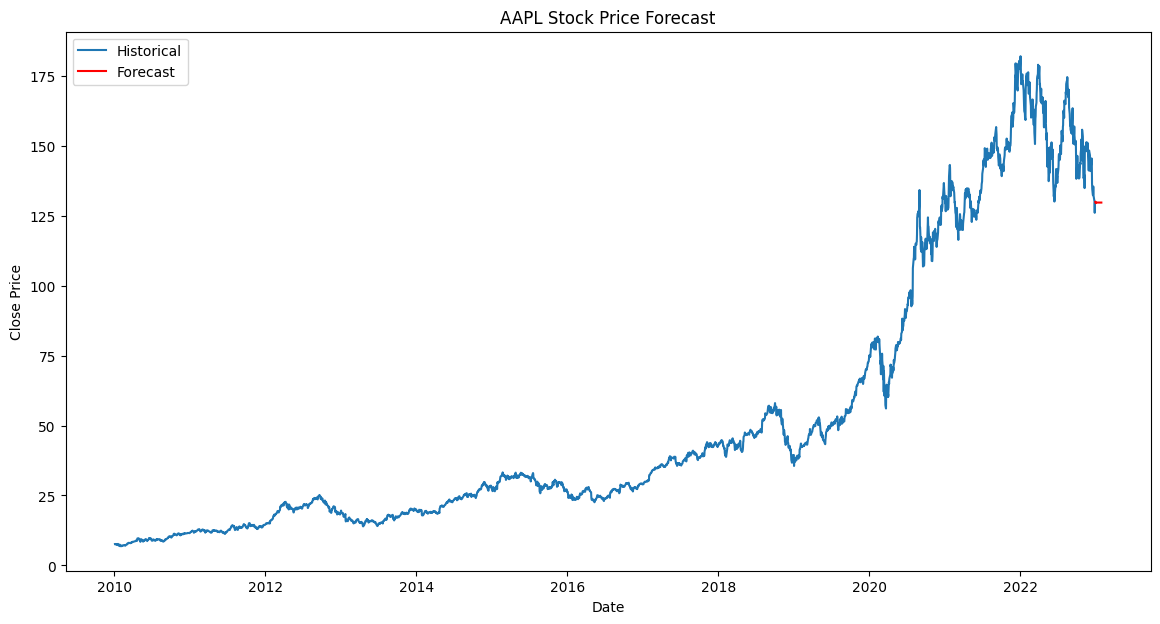

In [ ]:
# Forecasting
forecast_steps = 30 #next 30 days
forecast = model_fit.forecast(steps=forecast_steps)


forecast_index = pd.date_range(start=stock_prices.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(stock_prices, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Actual vs Predicted
predicted = model_fit.predict(start=0, end=len(stock_prices) - 1)
mse = mean_squared_error(stock_prices, predicted)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.9830200630082582
